In [1]:
import sys
sys.path.insert(0, '../src')
import pandas as pd
import numpy as np
from plotnine import ggplot, xlim,aes, geom_point,geom_smooth, geom_text, geom_abline,xlab, ylab, ggtitle, geom_dotplot,geom_violin, geom_boxplot,options,ylim
import importlib
from scipy.stats import skew,kurtosis, pearsonr

In [2]:
import pandas as pd
import numpy as np
from plotnine import ggplot, xlim,aes, geom_point,geom_smooth, geom_text, geom_abline,xlab, ylab, ggtitle, geom_dotplot,geom_violin, geom_boxplot,options,ylim
%matplotlib inline
from bicluster_preprocess import all_cols_otsu
import importlib
from scipy.stats import skew,kurtosis, pearsonr

In [8]:
from plotnine import stat_smooth, stat_boxplot
from plotnine.themes import theme_bw

In [5]:
exp_df = pd.read_csv("../data/cortical_drimpute.csv",header=0,index_col=0)

In [6]:
lambda_2 = all_cols_otsu(exp_df.values.transpose())
lambda_2_df = pd.DataFrame(data=np.matrix(lambda_2).transpose(), index=exp_df.index.values, columns=["lambda_2"])

/home/mkleyman/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The 

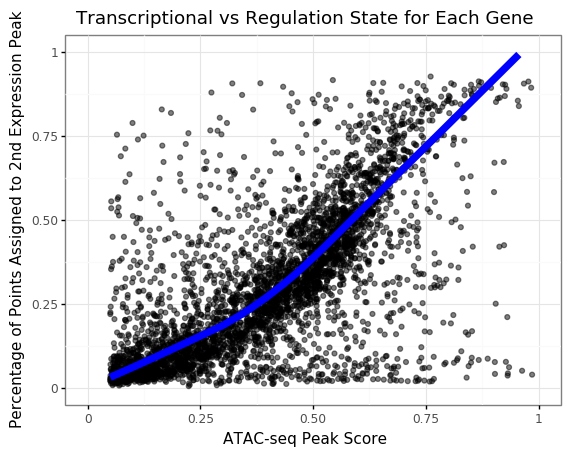

<ggplot: (-9223369068985509877)>

In [9]:
atac_file = "../data/cortical_scored_promoters_kb2_max.csv"
atac_df = pd.read_csv(atac_file,header=0,index_col=0)
gene_inter =  np.intersect1d(atac_df.index, lambda_2_df.index)
atac_df = atac_df.loc[gene_inter]
atac_df['lambda_2'] = lambda_2_df.loc[gene_inter][["lambda_2"]]
atac_df = atac_df.query('score>0.5')
atac_df["score"] = atac_df["score"]/10.0

gplot=ggplot(atac_df ,aes(x="score",y="lambda_2"))+geom_point(alpha=0.5)+stat_smooth(method="lowess",color="blue",size=3)+\
ylab("Percentage of Points Assigned to 2nd Expression Peak")+xlab("ATAC-seq Peak Score")+\
ggtitle("Transcriptional vs Regulation State for Each Gene")+ylim(0,1)+xlim(0,1) +theme_bw()
gplot.save("../plots/atac_score.png")
gplot

In [608]:
from scipy.stats import pearsonr, spearmanr
pearsonr(atac_df["score"], atac_df["lambda_2"])


(0.6531193104095696, 0.0)

In [10]:
exp_mat =exp_df.transpose()[atac_df.index].values

In [20]:
epi_vec = atac_df["score"].values
epi_vec = np.asarray([.95 if val>.95 else val for val in epi_vec])

In [8]:
exp_mat.shape

(1809, 3984)

In [9]:
import bicluster_em

In [10]:
best_cell_assignments, best_gene_assignments, best_aic, best_k =  bicluster_em.multi_k_em(exp_mat,epi_vec,range(5,15),.15,1800,"AIC")

initial e-step
initial clustering
0
optmizing j
optimizing i
-164224152.1011269
1
optmizing j
optimizing i
-128764201.16615695
2
optmizing j
optimizing i
-119676481.31596354
3
optmizing j
optimizing i
-115215438.75613555
4
optmizing j
optimizing i
-113077805.53521053
5
optmizing j
optimizing i
-111878294.28929387
6
optmizing j
optimizing i
-111096076.05742976
7
optmizing j
optimizing i
-110679984.07742955
8
optmizing j
optimizing i
-110506239.92301658
9
optmizing j
optimizing i
-110445444.36392231
10
optmizing j
optimizing i
-110379951.84654623
11
optmizing j
optimizing i
-110341444.4520389
12
optmizing j
optimizing i
-110303840.4821812
13
optmizing j
optimizing i
-110282648.07443957
14
optmizing j
optimizing i
-110265427.52832805
15
optmizing j
optimizing i
-110256594.95145765
16
optmizing j
optimizing i
-110253988.81179649
17
optmizing j
optimizing i
-110251723.2108556
18
optmizing j
optimizing i
-110248400.8787738
19
optmizing j
optimizing i
-110245598.278133
20
optmizing j
optimizi

In [12]:
best_k

14

In [13]:
best_cells = pd.DataFrame(best_cell_assignments,index=exp_df.columns.values)
#best_cells.to_csv("../data/cortical_cell_assignments_2.csv")

In [14]:
best_genes = pd.DataFrame(best_gene_assignments,index=atac_df.index.values)
#best_genes.to_csv("../data/cortical_gene_assignments_2.csv")

In [17]:
best_cells = pd.read_csv("../data/cortical_cell_assignments_2.csv",index_col=0)
best_genes = pd.read_csv("../data/cortical_gene_assignments_2.csv",index_col=0)
best_cell_assignments = best_cells.values
best_gene_assignments = best_genes.values
best_cell_assignments

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [18]:
biclust_predict =(np.dot(best_cell_assignments,best_gene_assignments.transpose()).astype(bool)).astype(float)

In [4]:
from bicluster_em import make_bimodal_params_numba, value_to_bimodal_prob_numba, spectral_cluster_cosine, assign_cells_init

In [21]:
bimodal_params = make_bimodal_params_numba(exp_mat,epi_vec)

In [22]:
log_prob_a, log_prob_b = value_to_bimodal_prob_numba(exp_mat, bimodal_params)

In [23]:
naive_predict = (log_prob_a>log_prob_b).astype(float)

In [24]:
atac_df.columns

Index(['promoter_length', 'score', 'Cux2', 'Gad2', 'Scnn1a', 'Rpb4', 'Nstr1',
       'lambda_2'],
      dtype='object')

In [39]:
cux2 = ["Cux2" in cell_name for cell_name in exp_df.columns.values]
gad2 = ["Gad2" in cell_name for cell_name in exp_df.columns.values]
scnn1a = ["Scnn1" in cell_name for cell_name in exp_df.columns.values]
rpb4 = ["Rbp4" in cell_name for cell_name in exp_df.columns.values ]
nstr1 = ["Ntsr" in cell_name for cell_name in exp_df.columns.values]

In [40]:
cell_type_matrix = np.asarray([cux2,gad2,scnn1a,rpb4,nstr1]).astype(float)

In [41]:
norm_matrix = (cell_type_matrix.transpose()/np.sum(cell_type_matrix,1)).transpose()
#norm_matrix = (cell_type_matrix/np.sum(cell_type_matrix))

In [42]:
facs_matrix = np.asarray([atac_df["Cux2"].values,atac_df["Gad2"].values,atac_df["Scnn1a"].values, atac_df["Rpb4"].values, atac_df["Nstr1"].values])

In [43]:
partial_biclust = np.dot(biclust_predict.transpose(),norm_matrix.transpose())

In [44]:
partial_naive = np.dot(naive_predict.transpose(),norm_matrix.transpose())

In [31]:
partial_biclust = np.dot(biclust_predict.transpose(),cell_type_matrix.transpose())
partial_naive = np.dot(naive_predict.transpose(),cell_type_matrix.transpose())

In [48]:
partial_naive

array([[0.06428571, 0.39655172, 0.13793103, 0.15837104, 0.20805369],
       [0.28571429, 0.33908046, 0.29310345, 0.34841629, 0.28187919],
       [0.10714286, 0.14942529, 0.08045977, 0.18552036, 0.16778523],
       ...,
       [0.11428571, 0.15517241, 0.13218391, 0.29411765, 0.13422819],
       [0.36428571, 0.54022989, 0.35632184, 0.50226244, 0.48322148],
       [0.4       , 0.57471264, 0.39655172, 0.54751131, 0.30201342]])

In [32]:
norm_factors=np.percentile(facs_matrix,98,1)
facs_norm = (facs_matrix.transpose()/norm_factors).transpose()


In [33]:
from scipy.spatial.distance import cosine

In [49]:
gene_list = []
corr= []
biclust_err = []
naive_err = []
em_corr=[]
model = []
dist= []
biclust_cos = []
naive_cos = []
for i in range(atac_df.index.values.size):
    gene_list.append(atac_df.index.values[i])
    gene_list.append(atac_df.index.values[i])
    #corr.append(np.sum(np.square(partial_biclust[i,:]-facs_matrix[:,i])))
    #corr.append(np.sum(np.square(partial_naive[i,:]-facs_matrix[:,i])))
    corr.append(1-cosine(partial_biclust[i,:],facs_norm[:,i]))
    #bicorr.append(1-cosine(partial_biclust[i,:],facs_norm[:,i]))
    corr.append(1-cosine(partial_naive[i,:],facs_norm[:,i]))
    biclust_err.append((np.mean(np.abs(partial_biclust[i,:]-facs_norm[:,i]))))
    naive_err.append((np.mean(np.abs(partial_naive[i,:]-facs_norm[:,i]))))
    biclust_cos.append(1-cosine(partial_biclust[i,:],facs_norm[:,i]))
    naive_cos.append(1-cosine(partial_naive[i,:],facs_norm[:,i]))
    #corr.append(pearsonr(partial_biclust[i,:],facs_matrix[:,i])[0])
    #corr.append(pearsonr(partial_naive[i,:],facs_matrix[:,i])[0])
    model.append("Gene Module Biclustering Model")
    model.append("Gene Independent Model")
    dist.append((np.mean(np.abs(partial_biclust[i,:]-facs_norm[:,i]))))
    dist.append((np.mean(np.abs(partial_naive[i,:]-facs_norm[:,i]))))

    

In [473]:
#naive_corr = [0.0 if not np.isfinite(val) else val for val in naive_corr]
#em_corr = [0.0 if not np.isfinite(val) else val for val in em_corr]
#corr = [0.0 if not np.isfinite(val) else val for val in corr]


In [507]:
cortical_result_dict = {"model":model,"corr":corr,"dist":dist}

In [508]:
#cortical_result_dict = {"gene":gene_list,"em_error":biclust_err,"naive_err":naive_err,"best_model":np.asarray(biclust_err)>np.asarray(naive_err),
  #                     "lambda2": atac_df["lambda_2"],"atac_score": atac_df["score"]}

In [509]:
cortical_result_df = pd.DataFrame(cortical_result_dict)


In [510]:
import seaborn as sns

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/utils.py:284: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/

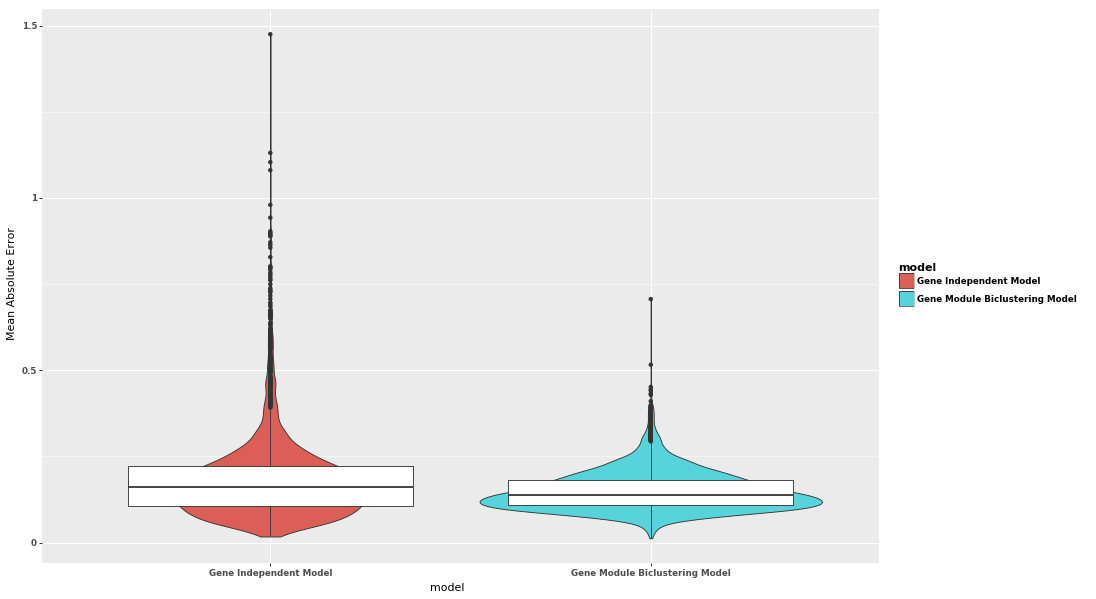

<ggplot: (2932987112740)>

In [449]:
ggplot(cortical_result_df,aes(x="model",y="dist",fill="model"))+geom_violin()+stat_boxplot(fill="white")+ylab("Mean Absolute Error")

/home/mkleyman/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


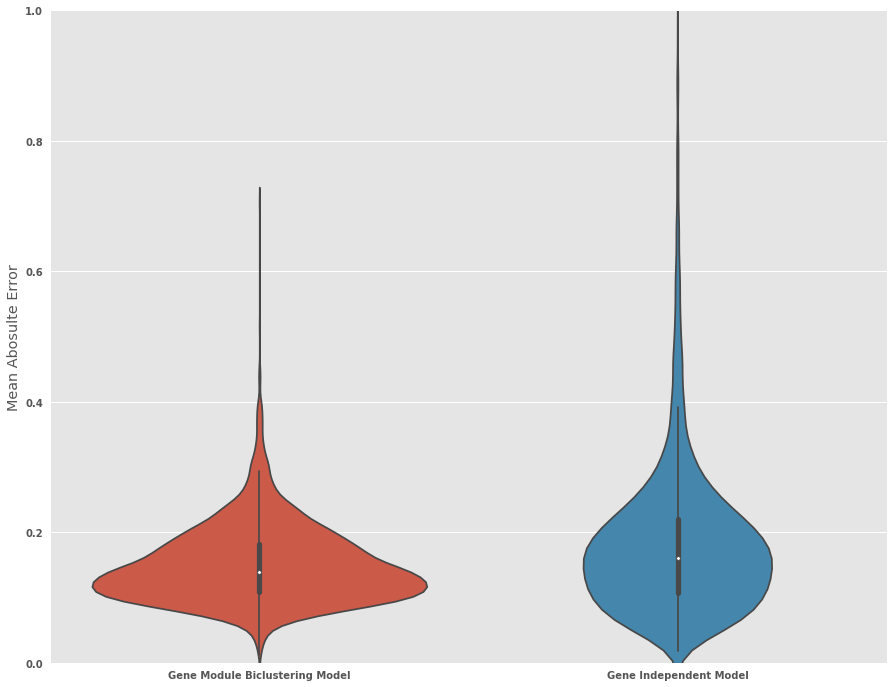

In [513]:
plt.rcParams["axes.grid"] = True

ax = sns.violinplot(x="model", y="dist", data=cortical_result_df)
ax.set(xlabel='', ylabel='Mean Abosulte Error')
axes = ax.axes
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
axes.set_ylim(0,1)
plt.savefig("../plots/mae_violin.png")

plt.show()


/home/mkleyman/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


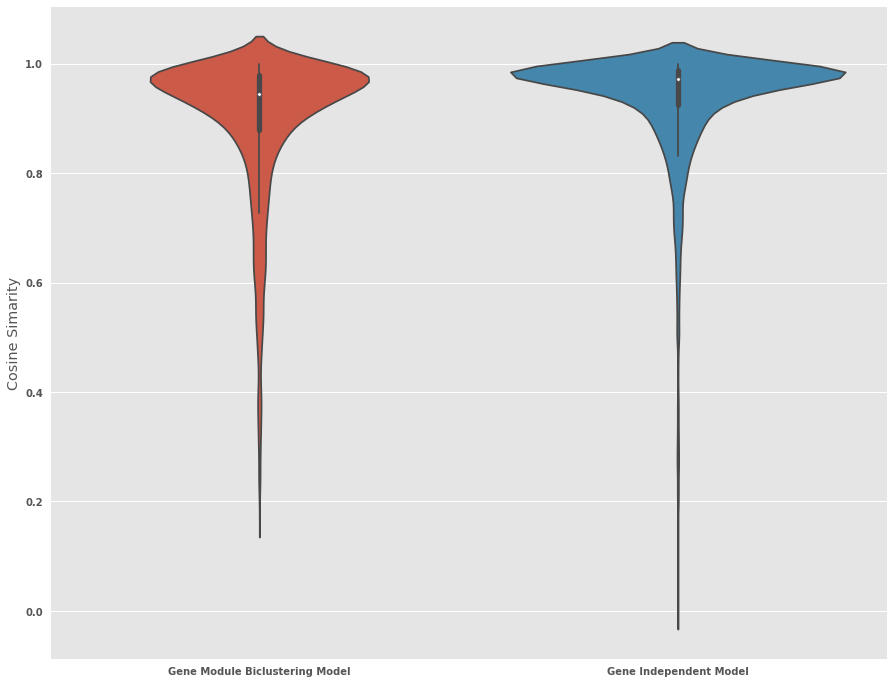

In [514]:

ax = sns.violinplot(x="model", y="corr", data=cortical_result_df)
ax.set(xlabel='', ylabel='Cosine Simarity')
axes = ax.axes
plt.savefig("../plots/cosine_violin.png")

plt.show()


In [50]:
cortical_result_dict = {"em_error":biclust_err,"naive_err":naive_err,"best_model":np.asarray(biclust_err)>np.asarray(naive_err),
                       "lambda2": atac_df["lambda_2"],"atac_score": atac_df["score"], "em_cos":biclust_cos,"naive_cos":naive_cos,
                       "best_cos":np.asarray(biclust_cos)<np.asarray(naive_cos) }
cortical_result_df = pd.DataFrame(cortical_result_dict)


In [36]:
np.sum(np.asarray(naive_cos)>0.85)/len(biclust_cos)

0.8536646586345381

[0.3954732483977895,
 0.07045414635715923,
 0.10580347086570292,
 0.24412461110334444,
 0.1338974036082521,
 0.10091952047800964,
 0.09971780244143404,
 0.19531857772643857,
 0.17694549660968312,
 0.05729639351671183,
 0.23793898621610926,
 0.20073749443951644,
 0.1314157917387313,
 0.11991553965576393,
 0.17422139375378448,
 0.07164453682918119,
 0.10099088172263955,
 0.2071148118589055,
 0.10050886063196543,
 0.28179109159811505,
 0.11963637971926414,
 0.1780337229145939,
 0.1596662165348209,
 0.11203122736121092,
 0.27599526269780894,
 0.06772002013760008,
 0.08551412354420349,
 0.16029628033760332,
 0.1320601202604561,
 0.12224794201435714,
 0.12651073435507415,
 0.1236766908013374,
 0.09697062578866342,
 0.1931749411749841,
 0.19532509859322397,
 0.14540587889035583,
 0.10890680510125883,
 0.11489878929091255,
 0.125169525507961,
 0.14733419622881905,
 0.11901890597762196,
 0.16498423164824377,
 0.0365841029492851,
 0.16028547435809598,
 0.11717418324824189,
 0.2151233984590621,
 

/home/mkleyman/anaconda3/lib/python3.6/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = func(*args)
/home/mkleyman/anaconda3/lib/python3.6/copy.py:274: MatplotlibDeprecationWarning: The 

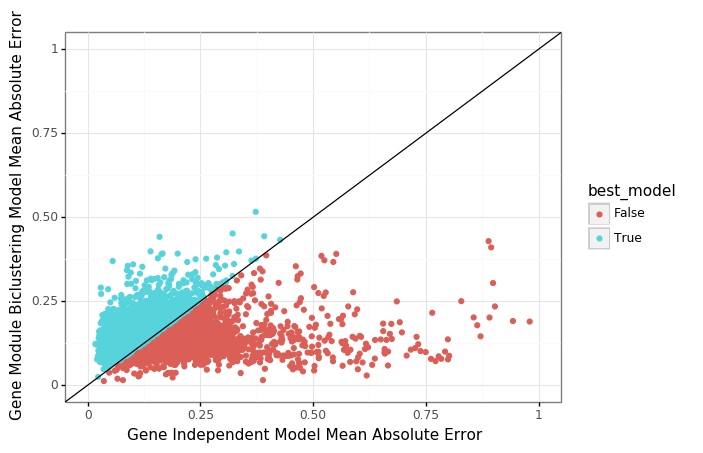

<ggplot: (-9223369068986303186)>

In [53]:
gplot =ggplot(cortical_result_df,aes(x="naive_err",y="biclust_err",color="best_model"))+geom_point()+geom_abline()+ylim(0,1.0)+\
xlim(0,1.0)+theme_bw()+xlab("Gene Independent Model Mean Absolute Error")+\
ylab("Gene Module Biclustering Model Mean Absolute Error")
gplot.save("../plots/mae_dotplot.png")
gplot

In [616]:
from scipy.stats import ttest_rel
print(ttest_rel(biclust_err,naive_err))
print(np.mean(naive_err))

Ttest_relResult(statistic=-16.361443165022145, pvalue=2.7611184121651226e-58)
0.18285880404599952


/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

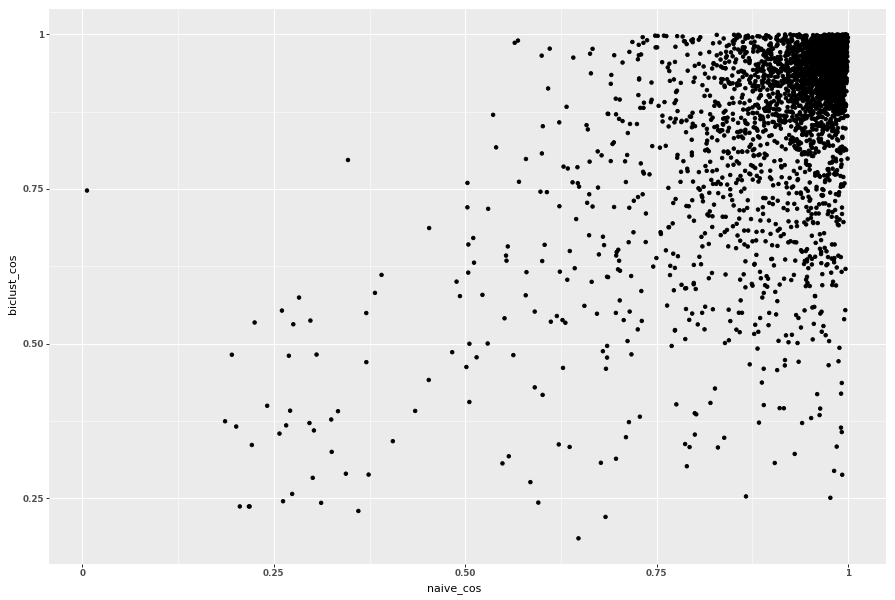

<ggplot: (2932907415549)>

In [409]:
ggplot(cortical_result_df,aes(x="naive_cos",y="biclust_cos"))+geom_point()

In [121]:
from plotnine import scale_color_continuous

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

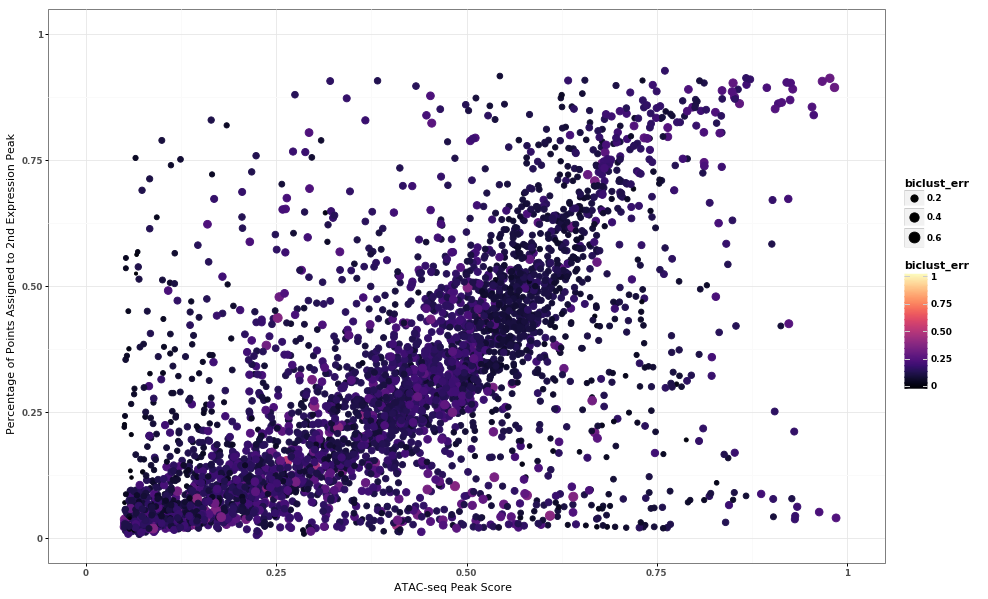

<ggplot: (-9223369103767413262)>

In [585]:
gplot=ggplot(cortical_result_df,aes(x="atac_score",y="lambda2",color="biclust_err", size="biclust_err"))+geom_point()+\
ylim(0,1.0)+xlim(0,1.0)+scale_color_continuous(name="magma",limits=[0,1])+theme_bw()+\
ylab("Percentage of Points Assigned to 2nd Expression Peak")+xlab("ATAC-seq Peak Score")
gplot.save("../plots/biclust_mae.png")
gplot

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

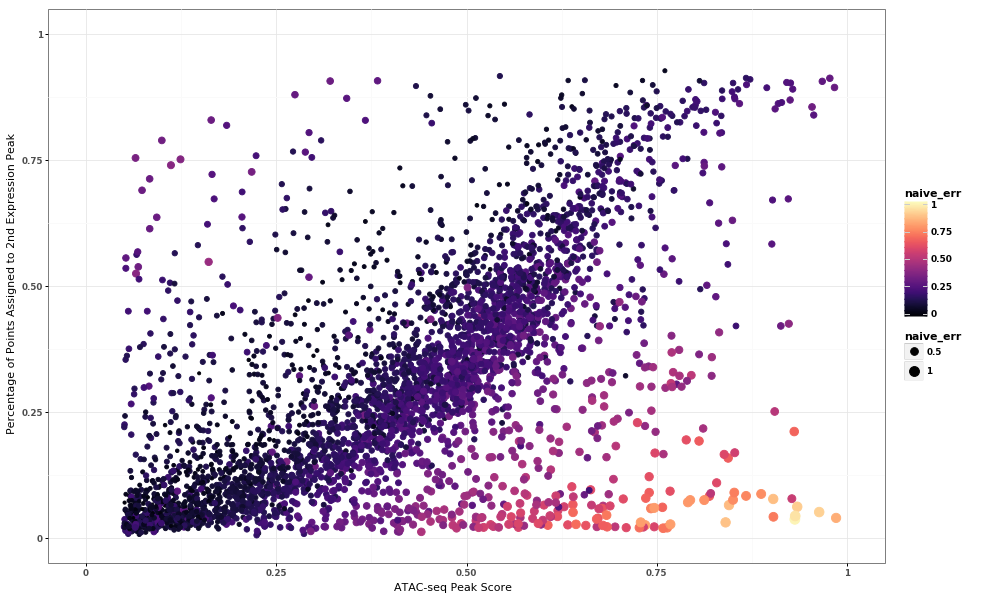

<ggplot: (2932913386458)>

In [584]:
gplot = ggplot(cortical_result_df,aes(x="atac_score",y="lambda2",color="naive_err", size="naive_err"))+geom_point()+ylim(0,1.0)+xlim(0,1.0)+\
scale_color_continuous(name="magma",limits=[0,1])+theme_bw()+\
ylab("Percentage of Points Assigned to 2nd Expression Peak")+xlab("ATAC-seq Peak Score")
gplot.save("../plots/naive_mae.png")
gplot

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

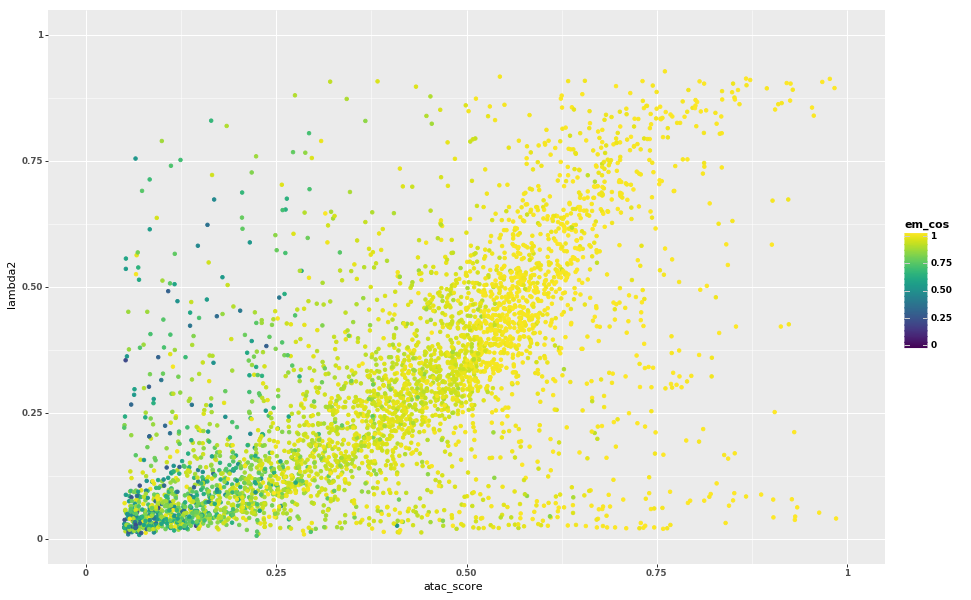

<ggplot: (-9223369103767231884)>

In [522]:
ggplot(cortical_result_df,aes(x="atac_score",y="lambda2",color="em_cos"))+geom_point()+ylim(0,1.0)+xlim(0,1.0)+scale_color_continuous(name="viridis",limits=[0,1])

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

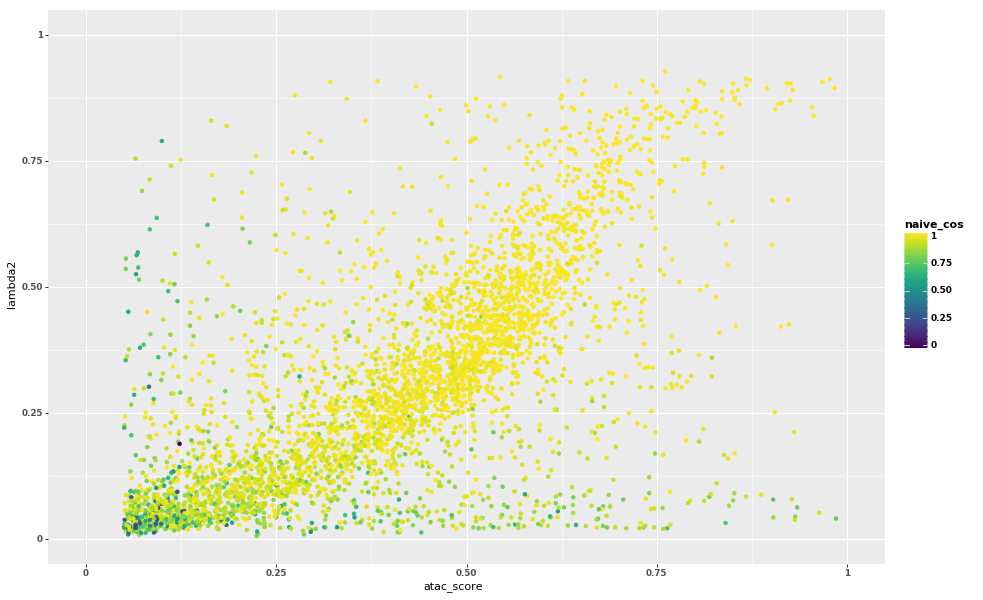

<ggplot: (-9223369103870642232)>

In [523]:
ggplot(cortical_result_df,aes(x="atac_score",y="lambda2",color="naive_cos"))+geom_point()+ylim(0,1.0)+xlim(0,1.0)+scale_color_continuous(name="viridis",limits=[0,1])

In [ ]:
ggplot(cortical_result_df,aes(x="naive_err",y="biclust_err",color="best_model",label="gene"))+geom_point()+geom_abline()+ylim(0,.5)+xlim(0,1.0)

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

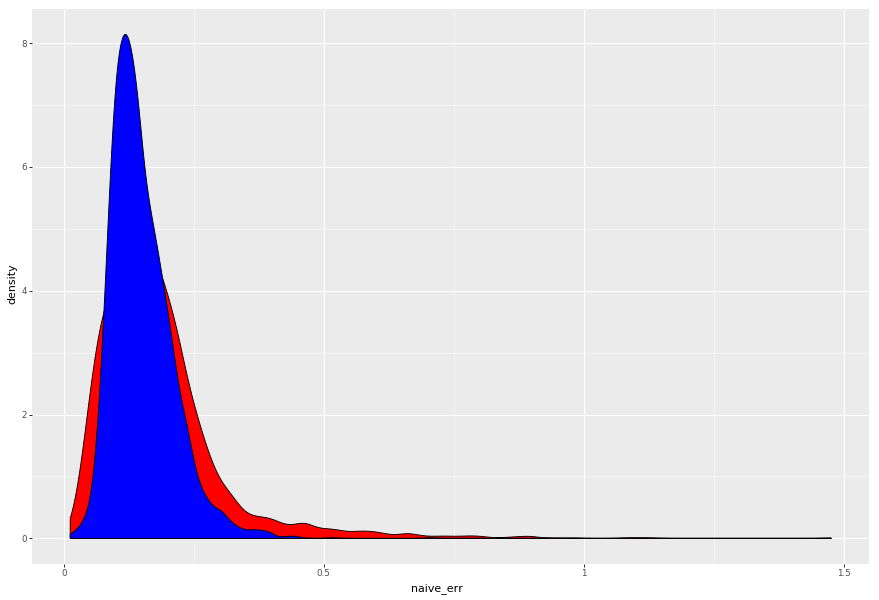

<ggplot: (-9223369103957719899)>

In [164]:
ggplot(cortical_result_df,aes(x="naive_err"))+geom_density(fill="red")+geom_density(aes(x="biclust_err"),fill="blue")

In [163]:
from plotnine import scale_color_continuous, options, geom_bin2d,geom_density
options.figure_size = (15, 10)

In [210]:
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, KMeans, SpectralClustering
from scipy.spatial.distance import pdist,squareform
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [249]:
affinity_matrix = 1.0 -squareform(pdist(best_cell_assignments,metric="minkowski",p=1,w=weights))

In [250]:
ag_clust = SpectralClustering(affinity="precomputed")
ag_clust.fit(affinity_matrix)
cluster_labels =  ag_clust.labels_


In [251]:
cell_types = np.argmax(cell_type_matrix,0)

In [252]:
adjusted_rand_score(cluster_labels,cell_types)

0.08737125244859469

In [254]:
adjusted_mutual_info_score(cluster_labels,cell_types)

/home/mkleyman/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.08938737166714121

In [240]:
for i in range(14):
    print(adjusted_rand_score(best_cell_assignments[:,i],cell_types))

0.10049059707230211
0.012578337674928379
0.023943555913360774
0.08928467028047651
-0.08116091848770352
0.019911294816127138
0.04518558643520093
-0.014595617206875865
0.043008896714563566
-0.02601155372856195
0.00024225472566422583
0.07637532232190831
0.08643017340910615
-0.00446949113644273


In [244]:
weights =np.sum(best_gene_assignments,0)/np.sum(best_gene_assignments)

In [54]:
canonical_cell_types_df =  pd.read_csv("../data/GSE71585_Clustering_Results.csv",header=0, index_col=0)
broad_cell_types =np.unique(canonical_cell_types_df["broad_type"].values)

In [55]:
broad_cell_types = broad_cell_types[0:7]

In [63]:
cell_type_bic_counts = np.zeros(shape=(broad_cell_types.size,14))
cell_type_counts = np.zeros(shape=broad_cell_types.size)
error_list = []
for i in range(best_cells.shape[0]):
    cell = best_cells.index[i]
    if cell in labeled_cell_types_filtered.index:
        c_type = canonical_cell_types_df.loc[cell]["broad_type"]
        c_index = np.argmax(broad_cell_types==c_type)
        cell_type_bic_counts[c_index,:] += best_cell_assignments[i,:]
        cell_type_counts[c_index]+=1.0

        

In [64]:
norm_cell_type_bic_counts = np.round((cell_type_bic_counts.transpose()/cell_type_counts).transpose(),2)

In [65]:
norm_cell_type_bic_counts

array([[0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.11,
        0.  , 0.08, 0.11],
       [0.  , 0.  , 0.03, 1.  , 0.  , 0.  , 0.21, 0.  , 0.  , 0.  , 0.93,
        0.  , 0.17, 0.14],
       [0.02, 0.23, 0.09, 0.03, 0.47, 0.2 , 0.17, 0.61, 0.22, 0.17, 0.28,
        0.02, 0.09, 0.5 ],
       [0.47, 0.37, 0.31, 0.05, 0.02, 0.4 , 0.2 , 0.02, 0.14, 0.06, 0.3 ,
        0.84, 0.47, 0.22],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.38,
        0.  , 0.  , 0.19],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.29, 0.  , 0.  , 0.  , 0.12,
        0.  , 0.17, 0.25],
       [0.  , 0.  , 0.08, 0.92, 0.  , 0.  , 0.92, 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.25, 0.67]])

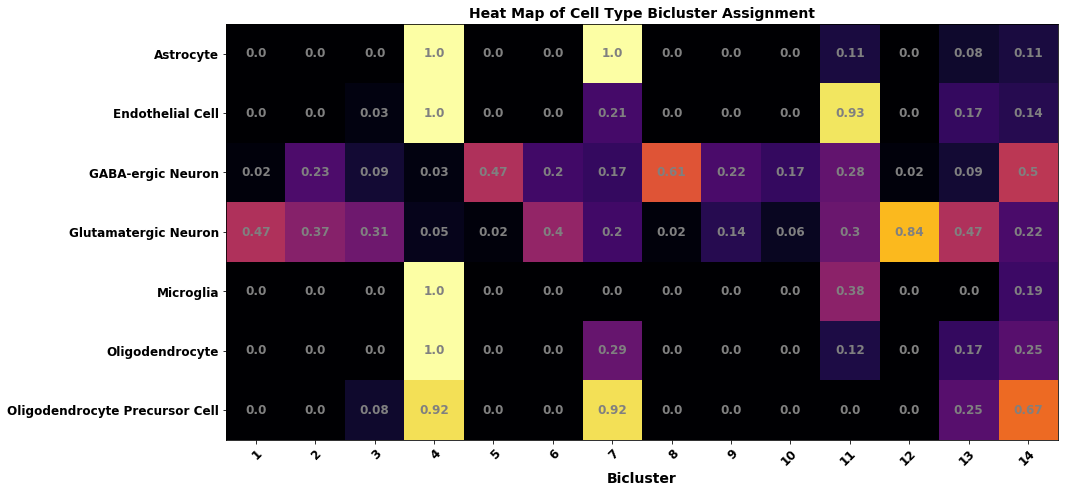

In [72]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False

bics = list(range(1,15))
cell_type_list = broad_cell_types.tolist()

fig, ax = plt.subplots()
im = ax.imshow(norm_cell_type_bic_counts,cmap="inferno")

ax.set_xticks(np.arange(len(bics)))
ax.set_yticks(np.arange(len(cell_type_list)))
# ... and label them with the respective list entries
ax.set_xticklabels(bics)
ax.set_yticklabels(cell_type_list)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

title_font =  {'fontweight' : 'bold',
        'fontsize'   : 14}

matplotlib.rc('font', **font)

ax.set_xlabel("Bicluster", fontdict=title_font)

# Loop over data dimensions and create text annotations.
for i in range(len(cell_type_list)):
    for j in range(len(bics)):
        text = ax.text(j, i, norm_cell_type_bic_counts[i, j],
                       ha="center", va="center", color="grey")
plt.rcParams["figure.figsize"] = [15,10]

ax.set_title("Heat Map of Cell Type Bicluster Assignment",fontdict=title_font)
fig.tight_layout()
plt.savefig("../plots/cell_type_heatmap.png")
plt.show()


In [67]:
labeled_cell_types_df = canonical_cell_types_df[canonical_cell_types_df["broad_type"]!="Unclassified"]

In [58]:
labeled_cell_types_df.shape

(1727, 12)

In [61]:
index_intersect = list(set(labeled_cell_types_df.index).intersection(set(best_cells.index)))

In [62]:
best_cells_filtered = best_cells.loc[index_intersect]
labeled_cell_types_filtered = labeled_cell_types_df.loc[index_intersect]
print(best_cells_filtered.shape)
print(labeled_cell_types_filtered.shape)

(1414, 14)
(1414, 12)


In [330]:
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
ward = AgglomerativeClustering()
ward.fit(best_cells_filtered.values)
predicted_types = ward.labels_

In [321]:
adjusted_mutual_info_score(predicted_types,labeled_cell_types_filtered["broad_type"])

/home/mkleyman/anaconda3/lib/python3.5/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.5883826245480716

In [322]:
adjusted_rand_score(predicted_types,labeled_cell_types_filtered["broad_type"])

0.7919602728153647

In [625]:
adjusted_rand_score(predicted_types,labeled_cell_types_filtered["broad_type"])

0.7919602728153647

In [325]:
exp_filtered = exp_df.transpose().loc[index_intersect]
exp_filtered.shape

(1414, 8664)

In [592]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [594]:
tsne_comp = tsne.fit_transform(exp_filtered.values)

In [617]:
kmeans = KMeans()
kmeans.fit(tsne_comp)
tsne_kmeans_labels = kmeans.labels_

In [618]:
adjusted_rand_score(tsne_kmeans_labels,labeled_cell_types_filtered["broad_type"])

0.3361491082582472

/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/coords/coord_cartesian.py:31: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  self.limits = Bunch(xlim=xlim, ylim=ylim)
/home/mkleyman/anaconda3/lib/python3.5/copy.py:292: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  y = callable(*args)
/home/mkleyman/anaconda3/lib/python3.5/site-packages/plotnine/facets/facet.py:132: MatplotlibDeprecationWarning: The Bunch class was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use types.SimpleNamespace instead.
  scales = Bunch()
/home/mkleyman/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/mkleyman/anaconda3/lib/python3.5/site-packages

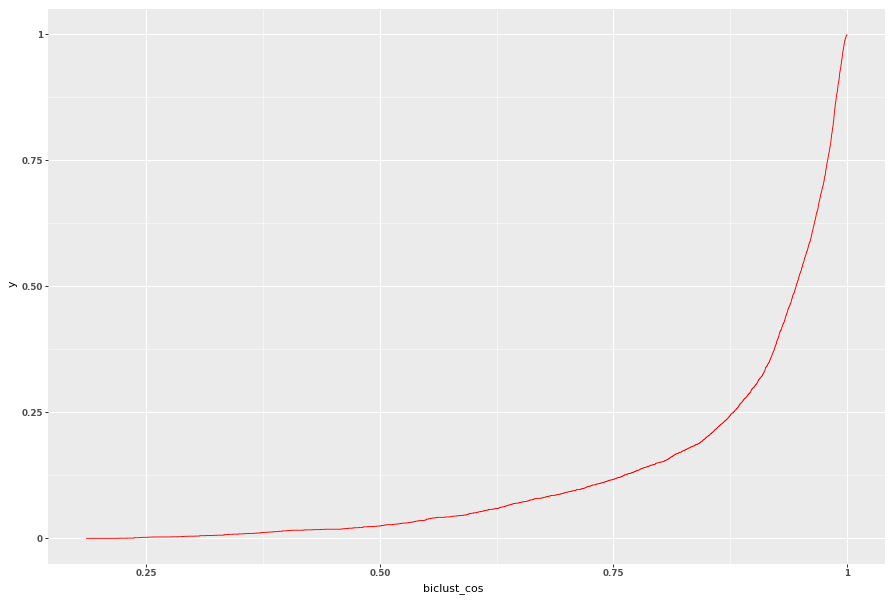

<ggplot: (-9223369103766896773)>

In [370]:
from plotnine.stats import stat_ecdf
ggplot(cortical_result_df,aes(x="biclust_cos"))+stat_ecdf(color="red")

In [384]:
for i in range(14):
    fname ="../data/cortical_genes_"+str(i)+".txt"
    gene_arr = best_genes.index[best_gene_assignments[:,i].astype(bool)].values
    np.savetxt(fname,gene_arr,fmt="%s")

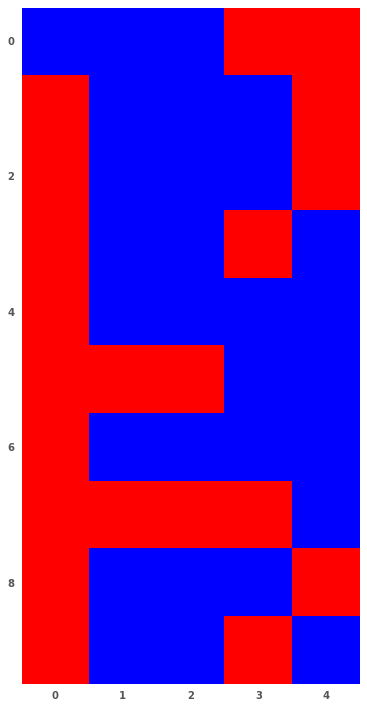

In [577]:
plt.rcParams["axes.grid"] = False

fig_mat = np.copy(biclust_predict[500:600,800:1000])
#fig_mat[:,199] = fig_mat[:,199] -0.01


fig, ax = plt.subplots()
im = ax.imshow(fig_mat[50:60,30:35],cmap="bwr")


plt.rcParams["figure.figsize"] = [15,10]

fig.tight_layout()
plt.show()


In [580]:
best_gene_assignments.shape

(3984, 14)

In [624]:
print("hello")

hello
